## Car Price Prediction Model

### Problem Statement ###

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the `factors on which the pricing of cars depends`. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which `variables are significant in predicting the price` of a car.
* How well those `variables describe` the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the `design of the cars`, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Step 1: Reading and Understanding the Data

import NumPy and Pandas and read the CarPrice_Assignment dataset.

In [135]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [136]:
import numpy as np
import pandas as pd

In [137]:
# Import the CarPrice_Assignment.csv file.
# As the car_ID is unique values it can be used as index column.
carprice = pd.read_csv('CarPrice_Assignment.csv', index_col='car_ID')
carprice.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [138]:
carprice.info()
# This shows that there are no null values in the dataframe.
# Rows - 205 & columns - 26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [139]:
carprice.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [140]:
# Only company name is the first part in CarName column.
# There are 2 types of seperator used '-' & Space, column splited at these points are company name seperated.
carprice['CarName'] = carprice['CarName'].str.split('-').str[0].str.split(' ').str[0]
# Successfully seperated company names from the column CarName.

# CarName renamed as company
carprice.rename(index = str,columns = {'CarName':'company'}, inplace=True)
carprice.head(3)

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [141]:
carprice.groupby('company').size()
# It is visible that there is duplication due to formatting and spelling errors.

company
Nissan         1
alfa           3
audi           7
bmw            8
buick          8
chevrolet      3
dodge          9
honda         13
isuzu          4
jaguar         3
maxda          2
mazda         15
mercury        1
mitsubishi    13
nissan        17
peugeot       11
plymouth       7
porcshce       1
porsche        4
renault        2
saab           6
subaru        12
toyota        31
toyouta        1
vokswagen      1
volkswagen     9
volvo         11
vw             2
dtype: int64

In [142]:
# It is visible above that mazda, nissan, porsche, toyota, volkswagen has formatting errors.
carprice['company'] = carprice['company'].str.lower() # nissan has upper & lower case letters.
carprice['company'] = carprice['company'].str.replace('maxda', 'mazda')
carprice['company'] = carprice['company'].str.replace('porcshce', 'porsche')
carprice['company'] = carprice['company'].str.replace('toyouta', 'toyota')
carprice['company'] = carprice['company'].str.replace('vokswagen', 'volkswagen').str.replace('vw', 'volkswagen')

carprice.groupby('company').size()

company
alfa           3
audi           7
bmw            8
buick          8
chevrolet      3
dodge          9
honda         13
isuzu          4
jaguar         3
mazda         17
mercury        1
mitsubishi    13
nissan        18
peugeot       11
plymouth       7
porsche        5
renault        2
saab           6
subaru        12
toyota        32
volkswagen    12
volvo         11
dtype: int64

In [143]:
carprice.info()
# all formatting errors in company name removed.
# No Null values present in any column.

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
company             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg           

In [144]:
# Drop duplicate rows if any:
carprice.drop_duplicates()

# No Duplicate rows found.
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
company             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg           

In [145]:
carprice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Visualisation

   By using `matplotlib` & `seaborn`
        - Stong predictor variable can be found. 
        - Multicollinearity can be easily found among variables.

In [146]:
# import required libraries.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Pairplot is a easy way to visualize data.

In [147]:
carprice.columns

Index(['symboling', 'company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [148]:
# Make 3 different dataframe (Visualisation is not possible in single plot), with price as first column. 

carprice_pairplot1 = carprice.loc[:,['price','symboling', 'company', 'fueltype', 'aspiration', 
                                     'doornumber','carbody','drivewheel', 'enginelocation','wheelbase', 
                                     'carlength','carwidth', 'carheight']]
carprice_pairplot2 = carprice.loc[:,['price','curbweight', 'enginetype', 'cylindernumber','enginesize',
                                     'fuelsystem', 'boreratio', 'stroke', 'compressionratio']]
carprice_pairplot3 = carprice.loc[:,['price','horsepower', 'peakrpm', 'citympg', 'highwaympg']]

<Figure size 720x720 with 0 Axes>

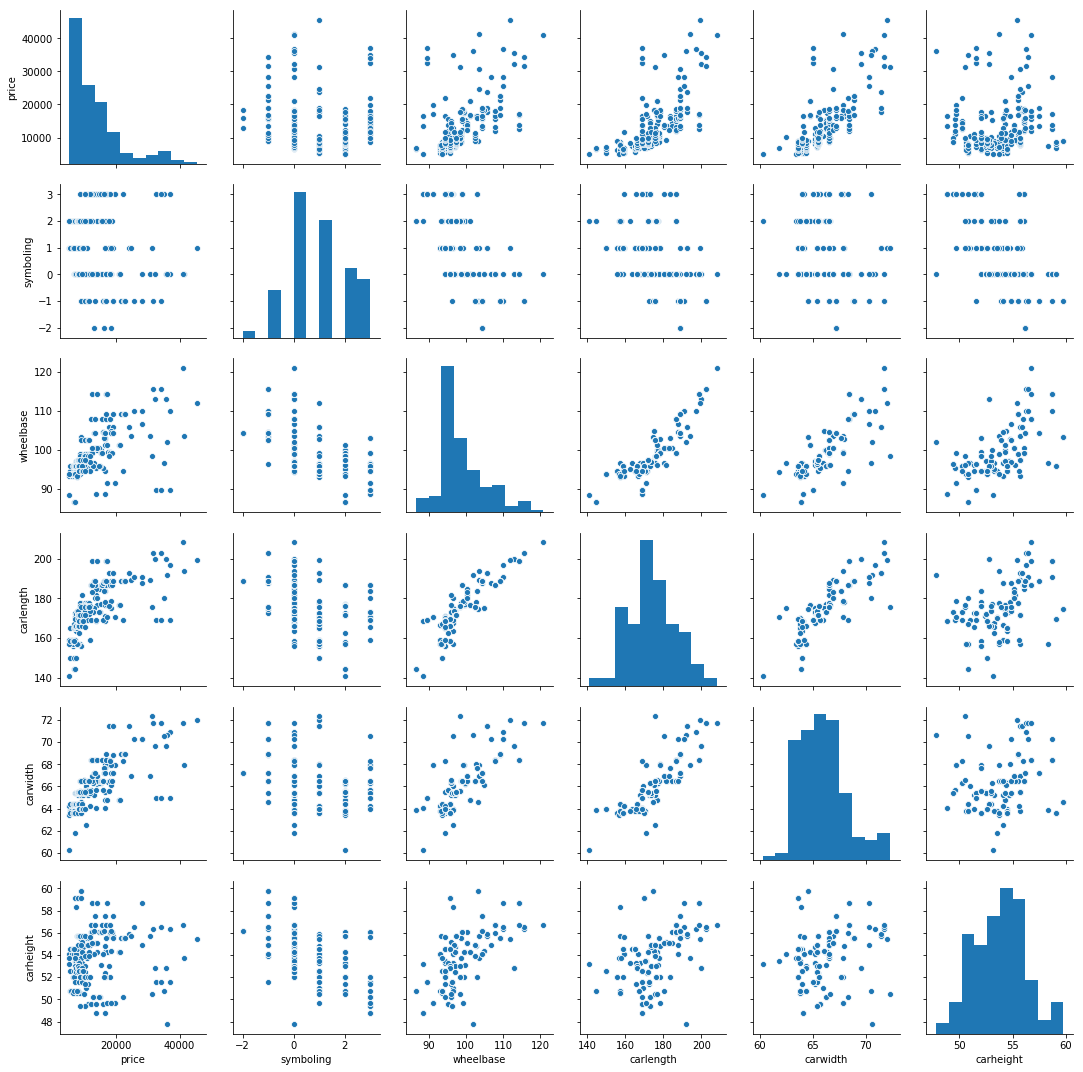

In [149]:
# First pairplot.
plt.figure(figsize = (10,10))
sns.pairplot(carprice_pairplot1)
plt.show()

- From the pairplot it is visible that price is corelated with wheelbase, carlength & carwidth.

<Figure size 720x720 with 0 Axes>

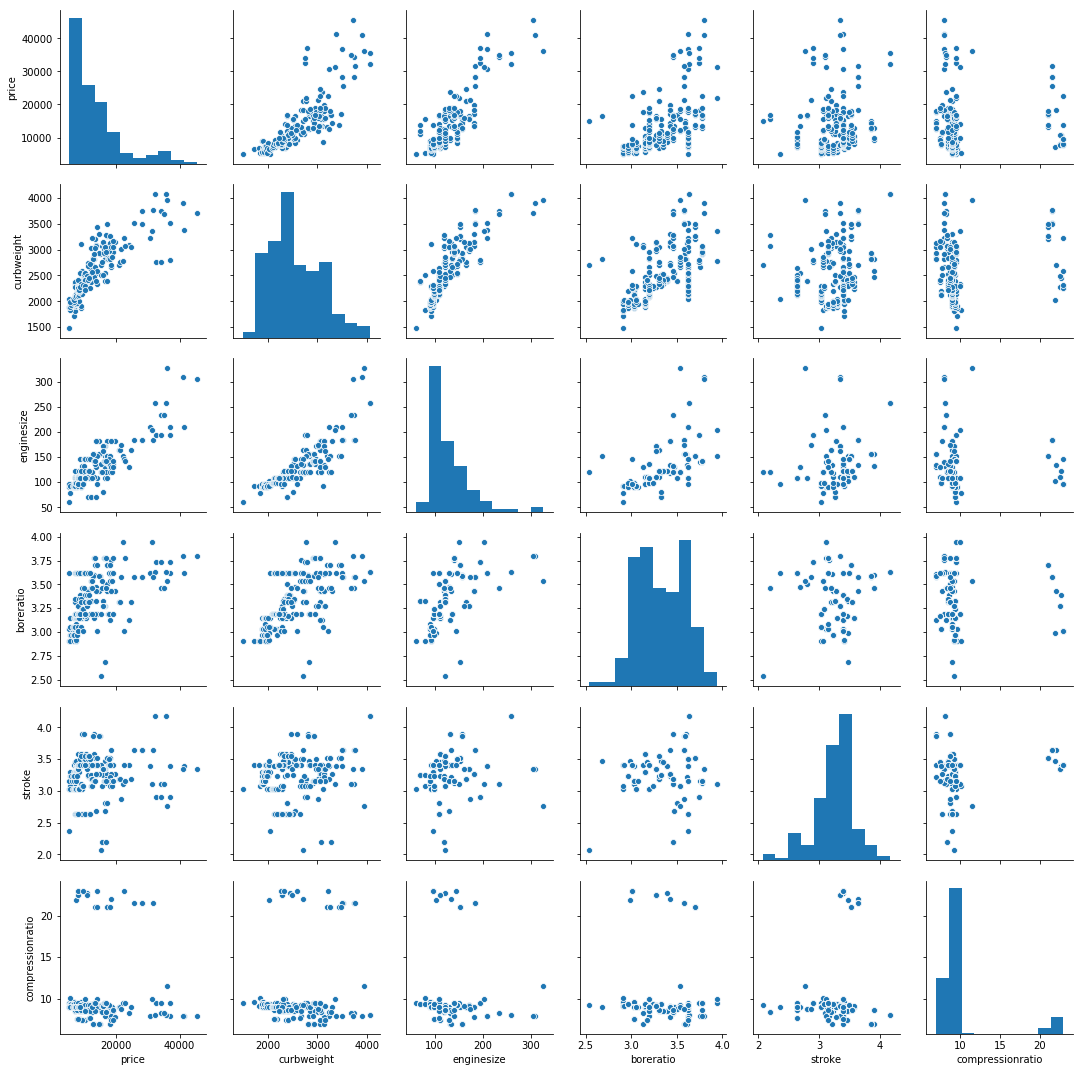

In [150]:
# Second pairplot.
plt.figure(figsize = (10,10))
sns.pairplot(carprice_pairplot2)
plt.show()

- From the above pairplot it can be seen that price is correlated with curbweight, enginesize and boreratio.

<Figure size 720x720 with 0 Axes>

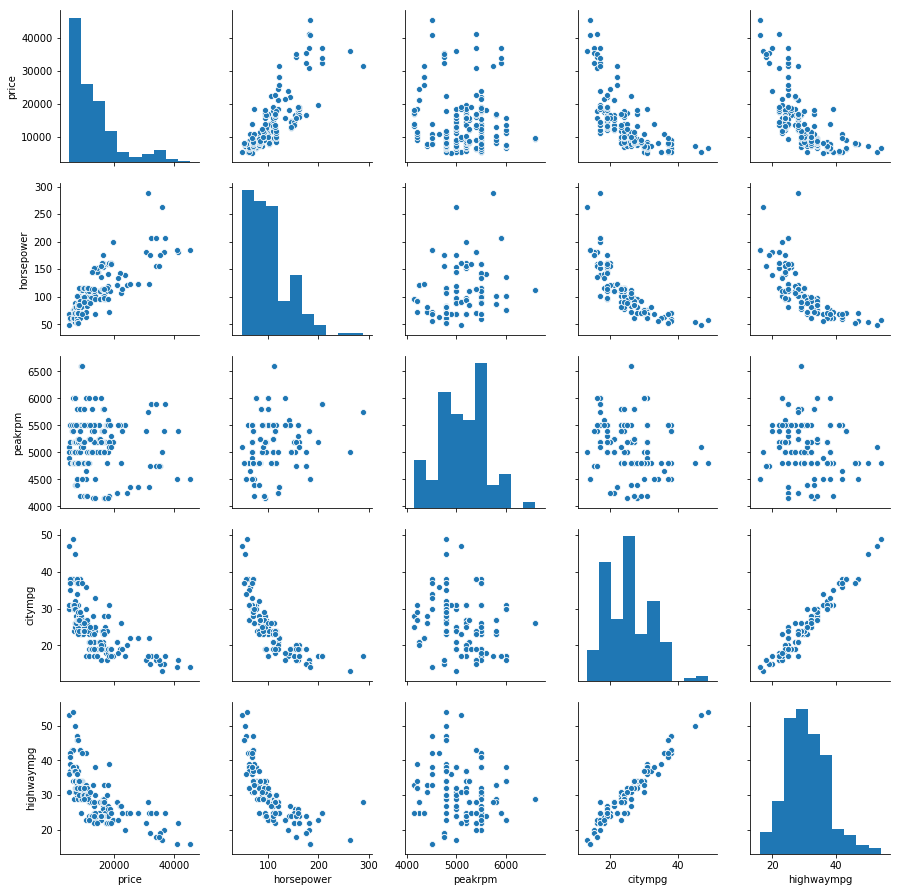

In [151]:
# Third pairplot.
plt.figure(figsize = (10,10))
sns.pairplot(carprice_pairplot3)
plt.show()

- From the above pairplots it is clear that price is corelated with horsepower, but has negative corelation with citympg & highwaympg.

#### Visualisation Categorical Variables.

There are columns (fueltype, aspiration, doornumber, enginelocation), which will be required to be converted to dummies.
Visualizing their effects on price using the boxplots. 

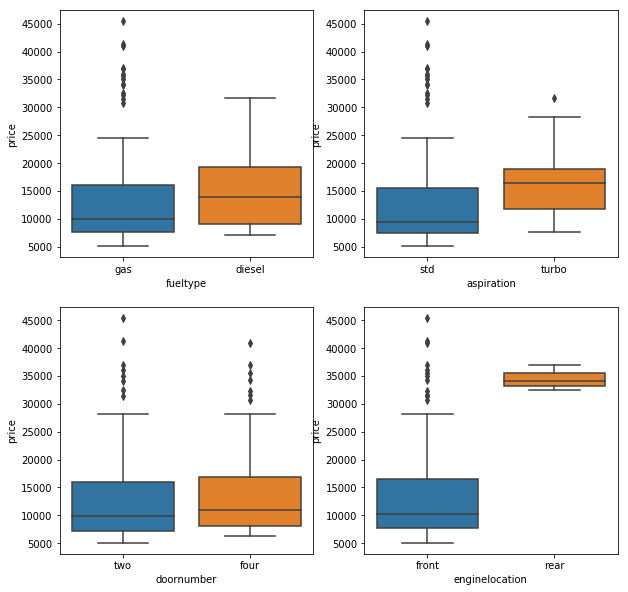

In [152]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)

plt.subplot(2,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)

plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)

plt.subplot(2,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)

plt.show()

It is visible from the boxplots that enginelocation is seems quite significant in predicting the price, doornumber is not significant and fueltype and aspiration maybe significant. 

In [153]:
# Columns with categorical values. Where dummy variables will be required.
carprice.select_dtypes(include=['object']).head(3)

,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


### Step 3: Data Preparation
- It is evident that there are multiple columns with categorical values, which can directly influence the price of car.

- For regression line, data is required in integer format, so categorical columns are converted into dummy/new columns for better representation and analysis.

In [154]:
# Create dummy.
dummy_fueltype = pd.get_dummies(carprice['fueltype'], drop_first = True)

# Suitably rename columns to avoid ambiguity.
dummy_fueltype.rename(columns = {'gas':'fueltype-gas'}, inplace=True)

# Add the result to orginal dataframe.
carprice = pd.concat([carprice,dummy_fueltype],axis = 1)
carprice.iloc[:,-10:].head(3)

,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype-gas
car_ID,,,,,,,,,,
1,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
2,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
3,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1


#### Repeating the process of creating and appending dummies to main dataframe for other categorical columns.

In [155]:
# Create
dummy_aspiration = pd.get_dummies(carprice['aspiration'],drop_first = True)

# Rename
dummy_aspiration.rename(columns = {'turbo':'aspiration-turbo'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_aspiration],axis = 1)
carprice.iloc[:,-10:].head(3)

,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype-gas,aspiration-turbo
car_ID,,,,,,,,,,
1,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
2,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
3,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0


In [156]:
# Create
dummy_doornumber = pd.get_dummies(carprice['doornumber'],drop_first = True)

# Rename
dummy_doornumber.rename(columns = {'two':'doornum-two'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_doornumber],axis = 1)
carprice.iloc[:,-10:].head(3)

,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype-gas,aspiration-turbo,doornum-two
car_ID,,,,,,,,,,
1,2.68,9.0,111,5000,21,27,13495.0,1,0,1
2,2.68,9.0,111,5000,21,27,16500.0,1,0,1
3,3.47,9.0,154,5000,19,26,16500.0,1,0,1


In [157]:
# Create
dummy_carbody = pd.get_dummies(carprice['carbody'],drop_first = True)

# Rename
dummy_carbody.rename(columns = {'hardtop':'body-hardtop','hatchback':'body-hatchback', 'sedan':'body-sedan',
                               'wagon':'body-wagon'}, inplace=True)
# Concatenate
carprice = pd.concat([carprice,dummy_carbody],axis = 1)
carprice.iloc[:,-10:].head(3)

,citympg,highwaympg,price,fueltype-gas,aspiration-turbo,doornum-two,body-hardtop,body-hatchback,body-sedan,body-wagon
car_ID,,,,,,,,,,
1,21,27,13495.0,1,0,1,0,0,0,0
2,21,27,16500.0,1,0,1,0,0,0,0
3,19,26,16500.0,1,0,1,0,1,0,0


In [158]:
# Create
dummy_drivewheel = pd.get_dummies(carprice['drivewheel'],drop_first = True)

# Rename
dummy_drivewheel.rename(columns = {'fwd':'drivewheel-fwd', 'rwd':'drivewheel-rwd'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_drivewheel],axis = 1)
carprice.iloc[:,-10:].head(3)

,price,fueltype-gas,aspiration-turbo,doornum-two,body-hardtop,body-hatchback,body-sedan,body-wagon,drivewheel-fwd,drivewheel-rwd
car_ID,,,,,,,,,,
1,13495.0,1,0,1,0,0,0,0,0,1
2,16500.0,1,0,1,0,0,0,0,0,1
3,16500.0,1,0,1,0,1,0,0,0,1


In [159]:
# Create
dummy_enginelocation = pd.get_dummies(carprice['enginelocation'], drop_first = True)

# Rename
dummy_enginelocation.rename(columns = {'rear':'engine-rear'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_enginelocation],axis = 1)
carprice.iloc[:,-10:].head(3)

,fueltype-gas,aspiration-turbo,doornum-two,body-hardtop,body-hatchback,body-sedan,body-wagon,drivewheel-fwd,drivewheel-rwd,engine-rear
car_ID,,,,,,,,,,
1,1,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0


In [160]:
# Create
dummy_enginetype = pd.get_dummies(carprice['enginetype'], drop_first = True)

# Rename
dummy_enginetype.rename(columns = {'dohcv':'eng-dohcv','l':'eng-l', 'ohc':'eng-ohc','ohcf':'eng-ohcf',
                                  'ohcv':'eng-ohcv','rotor':'eng-rotor'}, inplace=True)
# Concatenate
carprice = pd.concat([carprice,dummy_enginetype],axis = 1)
carprice.iloc[:,-10:].head(3)

,body-wagon,drivewheel-fwd,drivewheel-rwd,engine-rear,eng-dohcv,eng-l,eng-ohc,eng-ohcf,eng-ohcv,eng-rotor
car_ID,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0


In [161]:
#Create
dummy_cylindernumber = pd.get_dummies(carprice['cylindernumber'], drop_first = True)

# Rename
dummy_cylindernumber.rename(columns = {'five':'cyl-five','four':'cyl-four','six':'cyl-six','three':'cyl-three',
                                  'twelve':'cyl-twelve','two':'cyl-two'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_cylindernumber],axis = 1)
carprice.iloc[:,-10:].head(3)

,eng-ohc,eng-ohcf,eng-ohcv,eng-rotor,cyl-five,cyl-four,cyl-six,cyl-three,cyl-twelve,cyl-two
car_ID,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0


In [162]:
# Create
dummy_fuelsystem = pd.get_dummies(carprice['fuelsystem'], drop_first = True)

# Rename
dummy_fuelsystem.rename(columns = {'2bbl':'fuelsys-2bbl','4bbl':'fuelsys-4bbl','idi':'fuelsys-idi','mfi':'fuelsys-mfi',
                                  'mpfi':'fuelsys-mpfi','spdi':'fuelsys-spdi','spfi':'fuelsys-spfi'}, inplace=True)

# Concatenate
carprice = pd.concat([carprice,dummy_fuelsystem],axis = 1)
carprice.iloc[:,-10:].head(3)

,cyl-three,cyl-twelve,cyl-two,fuelsys-2bbl,fuelsys-4bbl,fuelsys-idi,fuelsys-mfi,fuelsys-mpfi,fuelsys-spdi,fuelsys-spfi
car_ID,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0


In [163]:
# Delete redundant columns from the dataframe, for which dummy columns have been created.
# Also, company column & symboling does not give details about any feature so, Not required for analysis.

carprice.drop(['company', 'symboling', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
               'enginetype','cylindernumber','fuelsystem'], axis = 1, inplace = True)

In [164]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cyl-three,cyl-twelve,cyl-two,fuelsys-2bbl,fuelsys-4bbl,fuelsys-idi,fuelsys-mfi,fuelsys-mpfi,fuelsys-spdi,fuelsys-spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# Re-checked for duplicate entries and deleted before model preparation.
carprice.drop_duplicates(inplace=True)
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 205
Data columns (total 43 columns):
wheelbase           204 non-null float64
carlength           204 non-null float64
carwidth            204 non-null float64
carheight           204 non-null float64
curbweight          204 non-null int64
enginesize          204 non-null int64
boreratio           204 non-null float64
stroke              204 non-null float64
compressionratio    204 non-null float64
horsepower          204 non-null int64
peakrpm             204 non-null int64
citympg             204 non-null int64
highwaympg          204 non-null int64
price               204 non-null float64
fueltype-gas        204 non-null uint8
aspiration-turbo    204 non-null uint8
doornum-two         204 non-null uint8
body-hardtop        204 non-null uint8
body-hatchback      204 non-null uint8
body-sedan          204 non-null uint8
body-wagon          204 non-null uint8
drivewheel-fwd      204 non-null uint8
drivewheel-rwd      204 no

#### The data is now suitable for building regression model as all the formatting, spelling errors corrected and categorical value changed to dummy variables.

### Step 4: Create Train and Test sets


In [166]:
# Import sklearn train & test spilt module.
from sklearn.model_selection import train_test_split

np.random.seed(0) # To set same rows always to the train and test data sets.

# Split data into 2 set train data = 70% and test data = 30%.
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [167]:
# Import Scaler from sklearn.
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler is used here because dummy variables generated are 0,1. It would give better interpretation and understanding.
scaler = MinMaxScaler()

In [168]:
# Total columns in dataset.
carprice.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype-gas',
       'aspiration-turbo', 'doornum-two', 'body-hardtop', 'body-hatchback',
       'body-sedan', 'body-wagon', 'drivewheel-fwd', 'drivewheel-rwd',
       'engine-rear', 'eng-dohcv', 'eng-l', 'eng-ohc', 'eng-ohcf', 'eng-ohcv',
       'eng-rotor', 'cyl-five', 'cyl-four', 'cyl-six', 'cyl-three',
       'cyl-twelve', 'cyl-two', 'fuelsys-2bbl', 'fuelsys-4bbl', 'fuelsys-idi',
       'fuelsys-mfi', 'fuelsys-mpfi', 'fuelsys-spdi', 'fuelsys-spfi'],
      dtype='object')

In [169]:
# Apply scaler() to all the columns except 'dummy' variables.
car_vars = ['wheelbase', 'carlength', 'carwidth','carheight',
            'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_train[car_vars] = scaler.fit_transform(df_train[car_vars])

In [170]:
df_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cyl-three,cyl-twelve,cyl-two,fuelsys-2bbl,fuelsys-4bbl,fuelsys-idi,fuelsys-mfi,fuelsys-mpfi,fuelsys-spdi,fuelsys-spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
166,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
142,0.365517,0.502439,0.425000,0.391667,0.254849,0.177358,0.746032,0.227273,0.15625,0.141667,...,0,0,0,1,0,0,0,0,0,0
184,0.368966,0.497561,0.433333,0.658333,0.279674,0.181132,0.404762,0.611111,0.12500,0.154167,...,0,0,0,0,0,0,0,1,0,0


In [171]:
# Describe the df_train data set for training.
# Total 143 rows are assigned to df_train set.
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cyl-three,cyl-twelve,cyl-two,fuelsys-2bbl,fuelsys-4bbl,fuelsys-idi,fuelsys-mfi,fuelsys-mpfi,fuelsys-spdi,fuelsys-spfi
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.0
mean,0.404832,0.523428,0.458803,0.487676,0.405323,0.241695,0.502403,0.536100,0.187641,0.230634,...,0.007042,0.007042,0.028169,0.352113,0.021127,0.084507,0.0,0.429577,0.056338,0.0
std,0.201454,0.203516,0.180039,0.206112,0.206122,0.156314,0.209059,0.159680,0.235471,0.170668,...,0.083918,0.083918,0.166041,0.479320,0.144316,0.279131,0.0,0.496768,0.231390,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.409756,0.308333,0.325000,0.246509,0.135849,0.299603,0.452020,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.505691,0.425000,0.500000,0.356672,0.184906,0.500000,0.545455,0.125000,0.195833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.475862,0.635772,0.516667,0.641667,0.524922,0.301887,0.706349,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


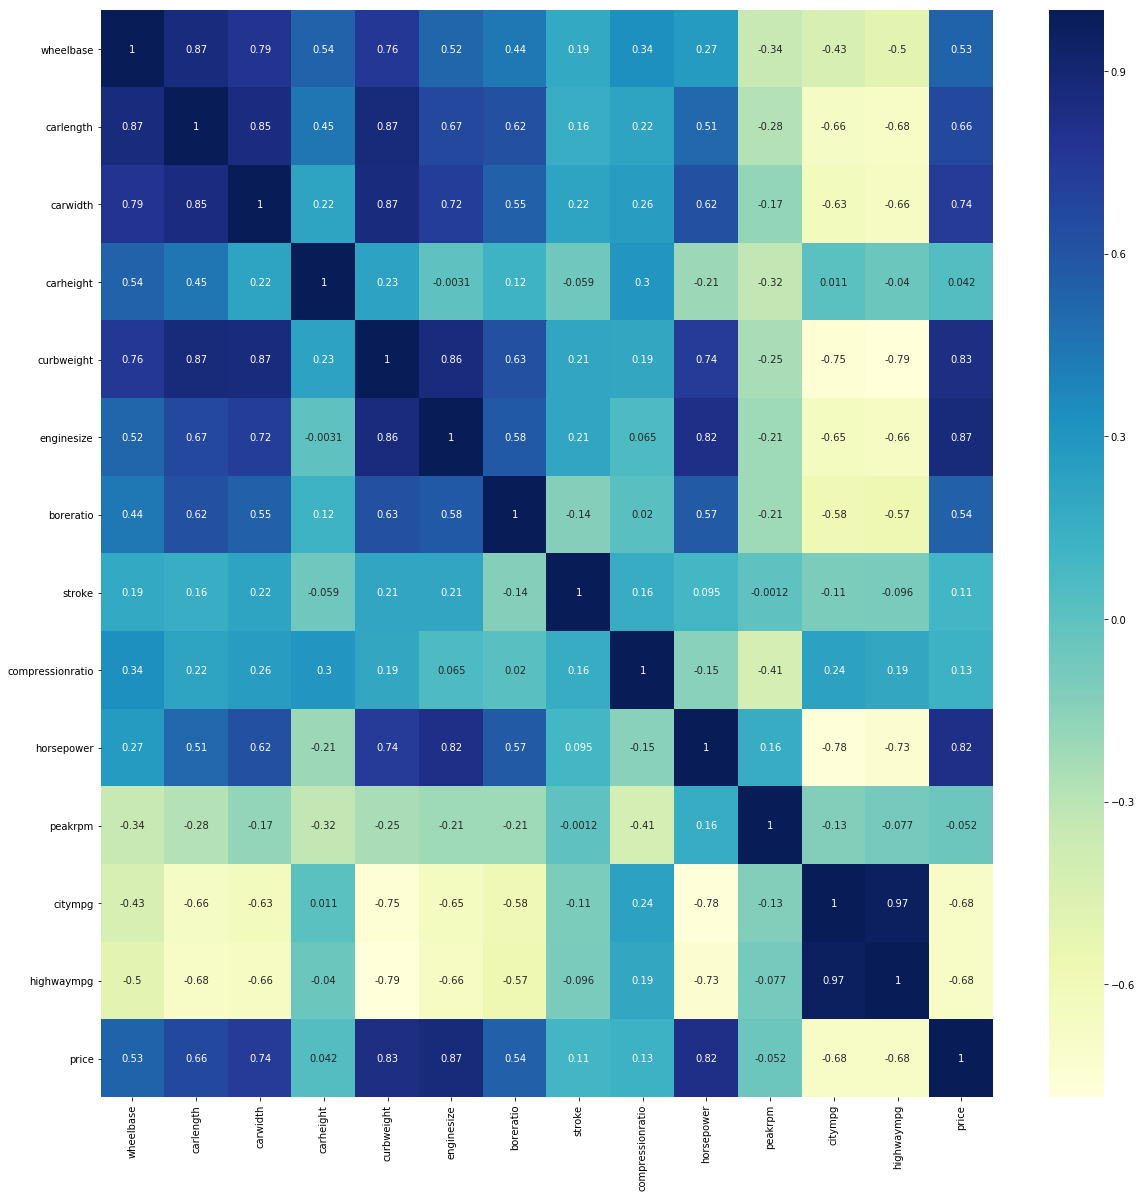

In [172]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.loc[:,'wheelbase':'price'].corr(), annot = True, cmap="YlGnBu")
plt.show()

 - Selction will be made for those variables having more that 0.5 corelation factor either positive or negative.
 
 - From the above heapmap, We can deduce that `wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`, `boreratio`, `horsepower`, `citympg` & `highwaympg` are corelated with the price. 
 - Except `citympg` and `highwaympg` all are positively corelated with corr values morethat 0.50

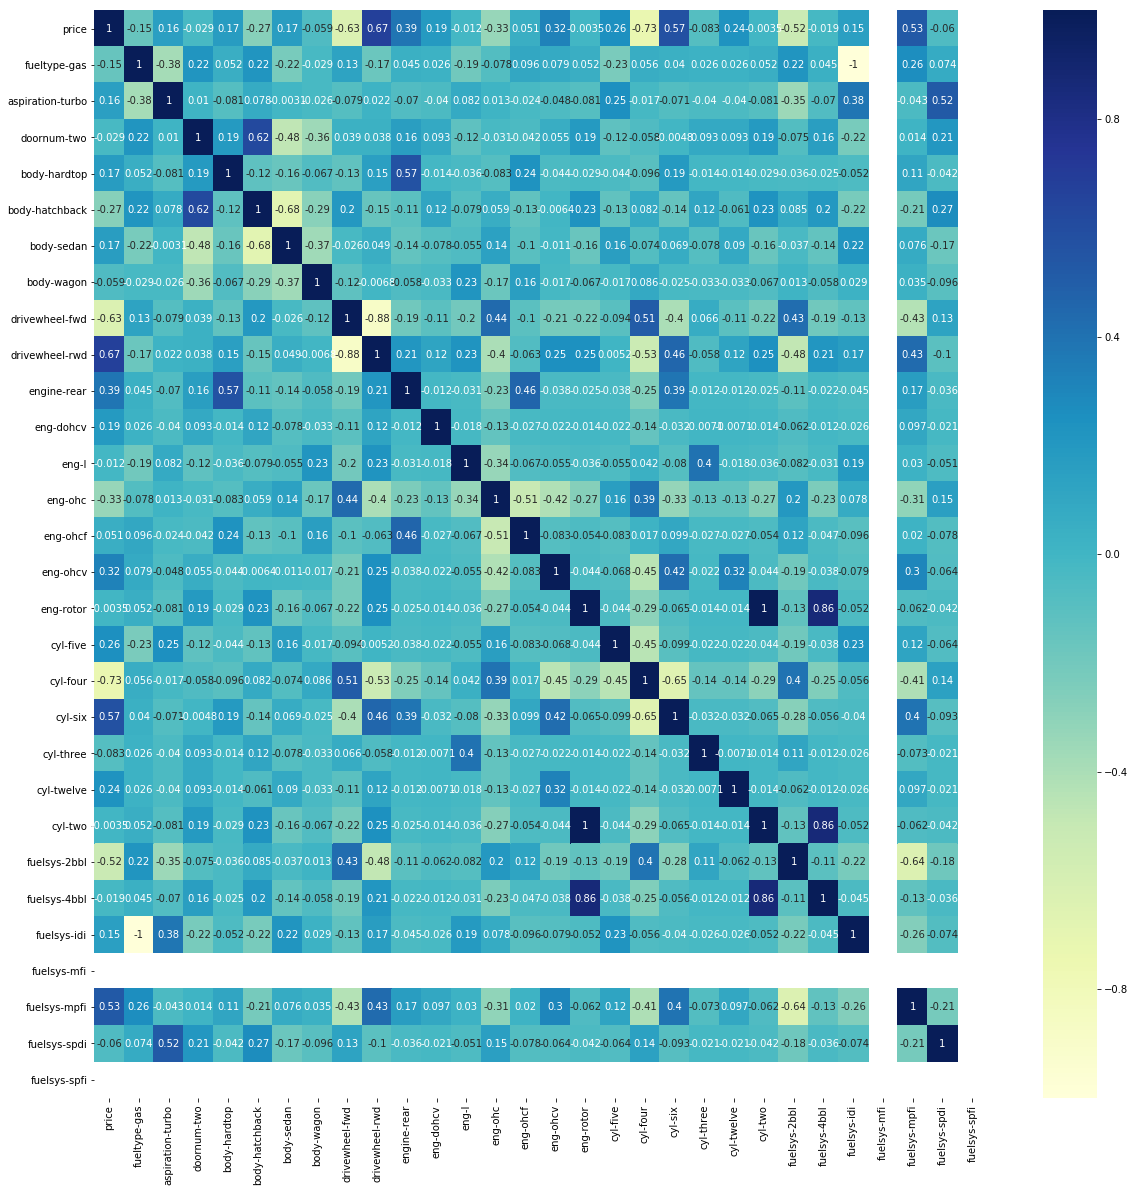

In [173]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.loc[:,'price':'fuelsys-spfi'].corr(), annot = True, cmap="YlGnBu")
plt.show()

 - Selction will be made for those variables having more that 0.5 corelation factor either positive or negative.
 
 - From the above heapmap, We can deduce that `fuelsys-mpfi`, `fuelsys-2bbl`, `cyl-six`, `cyl-four`, `drivewheel-rwd`, `drivewheel-fwd` are corelated with the price. 
 - Except `cyl-four` and `drivewheel-fwd` all are positively corelated with corr values morethat 0.50.

### Divide into X and y for model building

In [174]:
y_train = df_train.pop('price')
X_train = df_train

- Here, we will try to make model using Backward approach as the correlated variables are limited, which is evident from heatmap.
- Here, even Recursive feature elimination can be equally worked as we will select atleast 15 most important variables. 
- Now, we have started with 16 most important variables from the heatmap.
- First we will add all the features having high correlation and then using p-value, VIF. Model will be optimised to have good adjusted R square values.

In [175]:
# Assign all the feature variables to X_train.
X_train_1 = X_train[['wheelbase', 'carlength', 'carwidth', 'curbweight', 
                      'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 
                      'fuelsys-mpfi', 'fuelsys-2bbl', 'cyl-six', 'cyl-four', 'drivewheel-rwd', 'drivewheel-fwd' ]]

### Step 5: Model Building

In [176]:
# Building a linear model

import statsmodels.api as sm                        # Import the statmodels.api
X_train_lr_1 = sm.add_constant(X_train_1)           # Add constant to X_train_1 data set 

lr1 = sm.OLS(y_train, X_train_lr_1).fit()           # Build the Linear regression model.

lr1.params

const            -0.046178
wheelbase         0.041990
carlength         0.074691
carwidth          0.126091
curbweight        0.009538
enginesize        0.486232
boreratio         0.024288
horsepower        0.344919
citympg           0.050563
highwaympg        0.075688
fuelsys-mpfi     -0.005858
fuelsys-2bbl     -0.009549
cyl-six           0.008174
cyl-four         -0.121022
drivewheel-rwd    0.032058
drivewheel-fwd   -0.030519
dtype: float64

In [177]:
# Print the summary of the Liner regression model

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     52.99
Date:                Mon, 13 May 2019   Prob (F-statistic):           5.69e-47
Time:                        19:54:17   Log-Likelihood:                 151.68
No. Observations:                 142   AIC:                            -271.4
Df Residuals:                     126   BIC:                            -224.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0462      0.074     -0.

- Now, we see that there are a lot of variables with high p-value, which means that these variables are not significant in predicting the price.
- It can be because of 2 reasons.
    - Either the feature has no correlation with the dependant variable
    - Or, In presence of other correlated variables, it has become insignificant.

- For this, We will import `variance_inflation_factor` from statsmodels to check the VIF value, which is measure of correlation among the independant variable.
- Using both `p-value` and `VIF` value, we can decide on which feature is not significant and we will eliminate it and rebuild the model.

   - First we will select the feature, which is highly insignificant and then check if the `VIF` value is high (i.e. >5) for that feature if:
      - Yes, then we will drop the feature
      - else, select the other feature, which is both highly insignificant compared to others and also have high VIF values.
      
- Then, we will delete those feature, which are ingnificant.
- Then, we will delete those feauture, where high VIF values are exhibited.

In [178]:
# Import the variance_inflation_factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,highwaympg,124.37
7,citympg,115.76
1,carlength,89.48
3,curbweight,82.48
2,carwidth,62.21
0,wheelbase,37.70
6,horsepower,23.14
4,enginesize,22.72
5,boreratio,18.40
14,drivewheel-fwd,14.33


- Adj. R square is 0.847, which is good but model has high numbers of variables with insignificance.
- `curbweight` is highly insignificant with p-value of 0.953 and `VIF` of 82.48 , so it will be dropped and rebuild the model.

### Step 6: Model optimisation by feature elimination

In [180]:
# Dropping highly insignificant & correlated variables variables.

X_train_2 = X_train_1.drop('curbweight', 1,)

# Build a new fitted model
X_train_lr_2 = sm.add_constant(X_train_2)

lr2 = sm.OLS(y_train, X_train_lr_2).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr2.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     57.23
Date:                Mon, 13 May 2019   Prob (F-statistic):           7.38e-48
Time:                        19:54:17   Log-Likelihood:                 151.68
No. Observations:                 142   AIC:                            -273.4
Df Residuals:                     127   BIC:                            -229.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0444      0.067     -0.

- Model 2 
- Here `cyl-six` has high p-value of 0.827 but VIF is < 5.
- After, `cyl-six`, `citympg` has highest insignificance and `VIF` of 113.21.
- Drop `citympg`.

In [181]:
# Model 3
# Dropping highly insignificant & correlated variables variables.

X_train_3 = X_train_2.drop('citympg', 1,)

# Build a new fitted model
X_train_lr_3 = sm.add_constant(X_train_3)

lr3 = sm.OLS(y_train, X_train_lr_3).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr3.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     62.08
Date:                Mon, 13 May 2019   Prob (F-statistic):           9.42e-49
Time:                        19:54:17   Log-Likelihood:                 151.64
No. Observations:                 142   AIC:                            -275.3
Df Residuals:                     128   BIC:                            -233.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0395      0.064     -0.

- Model 3
- After analysing the details it is found that `wheelbase` is both highly insignificant and have high `VIF` value compared to other variables.
- Drop `wheelbase` and build new model.

In [182]:
# Model 4
# Dropping highly insignificant & correlated variables variables.

X_train_4 = X_train_3.drop('wheelbase', 1,)

# Build a new fitted model
X_train_lr_4 = sm.add_constant(X_train_4)

lr4 = sm.OLS(y_train, X_train_lr_4).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr4.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     67.62
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.27e-49
Time:                        19:54:17   Log-Likelihood:                 151.50
No. Observations:                 142   AIC:                            -277.0
Df Residuals:                     129   BIC:                            -238.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0405      0.064     -0.

- Model 4
- `Boreratio` p-value = 0.733 & `VIF` = 17.99 (Both insignificant & correlated).
- Drop the `Boreration` and rebuild the model.

In [183]:
# Model 5
# Dropping highly insignificant & correlated variables variables.

X_train_5 = X_train_4.drop('boreratio', 1,)

# Build a new fitted model
X_train_lr_5 = sm.add_constant(X_train_5)

lr5 = sm.OLS(y_train, X_train_lr_5).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr5.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     74.26
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.52e-50
Time:                        19:54:17   Log-Likelihood:                 151.43
No. Observations:                 142   AIC:                            -278.9
Df Residuals:                     130   BIC:                            -243.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0394      0.063     -0.

- Model 5
- `drivewheel-rwd` p-value = 0.351 & `VIF` = 7.58 (Both insignificant & correlated).
- Drop the `drivewheel-rwd` and rebuild the model.

In [184]:
# Model 6
# Dropping highly insignificant & correlated variables variables.

X_train_6 = X_train_5.drop('drivewheel-rwd', 1,)

# Build a new fitted model
X_train_lr_6 = sm.add_constant(X_train_6)

lr6 = sm.OLS(y_train, X_train_lr_6).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr6.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.68
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.53e-51
Time:                        19:54:17   Log-Likelihood:                 150.96
No. Observations:                 142   AIC:                            -279.9
Df Residuals:                     131   BIC:                            -247.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0223      0.061     -0.

- Model 6
- `carlength` p-value = 0.21 & `VIF` = 42.75 (Both insignificant & correlated).
- Drop the `carlength` and rebuild the model.

In [185]:
# Model 7
# Dropping highly insignificant & correlated variables variables.

X_train_7 = X_train_6.drop('carlength', 1,)

# Build a new fitted model
X_train_lr_7 = sm.add_constant(X_train_7)

lr7 = sm.OLS(y_train, X_train_lr_7).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr7.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     90.17
Date:                Mon, 13 May 2019   Prob (F-statistic):           5.64e-52
Time:                        19:54:17   Log-Likelihood:                 150.10
No. Observations:                 142   AIC:                            -280.2
Df Residuals:                     132   BIC:                            -250.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0013      0.059     -0.

- Model 7
- `highwaympg` p-value = 0.179 & `VIF` = 9.88 (Both insignificant & correlated).
- Drop the `highwaympg` and rebuild the model.

In [186]:
# Model 8
# Dropping highly insignificant & correlated variables variables.

X_train_8 = X_train_7.drop('highwaympg', 1,)

# Build a new fitted model
X_train_lr_8 = sm.add_constant(X_train_8)

lr8 = sm.OLS(y_train, X_train_lr_8).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr8.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.34e-52
Time:                        19:54:17   Log-Likelihood:                 149.12
No. Observations:                 142   AIC:                            -280.2
Df Residuals:                     133   BIC:                            -253.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0451      0.048      0.

- Model 8
- Now, There are no variables, which is both insignificant and correlated. So, we will eliminate the feature with high p-values. (i.e. in the order of insignificance)
- `fuelsys-mpfi` p-value = 0.733 & `VIF` = 3.58 (insignificant).
- Drop the `fuelsys-mpfi` and rebuild the model.

In [187]:
# Model 9
# Dropping highly insignificant & correlated variables variables.

X_train_9 = X_train_8.drop('fuelsys-mpfi', 1,)

# Build a new fitted model
X_train_lr_9 = sm.add_constant(X_train_9)

lr9 = sm.OLS(y_train, X_train_lr_9).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr9.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.27e-53
Time:                        19:54:17   Log-Likelihood:                 149.06
No. Observations:                 142   AIC:                            -282.1
Df Residuals:                     134   BIC:                            -258.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0430      0.047      0.

- Model 9
- `fuelsys-2bbl` p-value = 0.789 & `VIF` = 2.17 (insignificant).
- Drop the `fuelsys-mpfi` and rebuild the model.

In [188]:
# Model 10
# Dropping highly insignificant & correlated variables variables.

X_train_10 = X_train_9.drop('fuelsys-2bbl', 1,)

# Build a new fitted model
X_train_lr_10 = sm.add_constant(X_train_10)

lr10 = sm.OLS(y_train, X_train_lr_10).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr10.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.08e-54
Time:                        19:54:17   Log-Likelihood:                 149.02
No. Observations:                 142   AIC:                            -284.0
Df Residuals:                     135   BIC:                            -263.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0379      0.043      0.

- Model 10
- `cyl-six` p-value = 0.409 & `VIF` = 2.17 (insignificant).
- Drop the `cyl-six` and rebuild the model.

In [189]:
# Model 11
# Dropping highly insignificant & correlated variables variables.

X_train_11 = X_train_10.drop('cyl-six', 1,)

# Build a new fitted model
X_train_lr_11 = sm.add_constant(X_train_11)

lr11 = sm.OLS(y_train, X_train_lr_11).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr11.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.12e-55
Time:                        19:54:18   Log-Likelihood:                 148.66
No. Observations:                 142   AIC:                            -285.3
Df Residuals:                     136   BIC:                            -267.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0539      0.038      1.

- Model 11
- Now, all the feature exihibit a significant values but still we need to drop the features showing high correlation (high `VIF` value >5)
- `enginesize` p-value = 0.000 & `VIF` = 13.86 (high correlation).
- Drop the `enginesize` and rebuild the model.

In [190]:
# Model 12
# Dropping highly insignificant & correlated variables variables.

X_train_12 = X_train_11.drop('enginesize', 1,)

# Build a new fitted model
X_train_lr_12 = sm.add_constant(X_train_12)

lr12 = sm.OLS(y_train, X_train_lr_12).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr12.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.22e-49
Time:                        19:54:18   Log-Likelihood:                 131.38
No. Observations:                 142   AIC:                            -252.8
Df Residuals:                     137   BIC:                            -238.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0650      0.043      1.

- Model 12
- `carwidth` p-value = 0.000 & `VIF` = 8.21 (correlation).
- Drop the `carwidth` and rebuild the model.

In [191]:
# Model 13
# Dropping highly insignificant & correlated variables variables.

X_train_13 = X_train_12.drop('carwidth', 1,)

# Build a new fitted model
X_train_lr_13 = sm.add_constant(X_train_13)

lr13 = sm.OLS(y_train, X_train_lr_13).fit()


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lr13.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.10e-43
Time:                        19:54:18   Log-Likelihood:                 114.41
No. Observations:                 142   AIC:                            -220.8
Df Residuals:                     138   BIC:                            -209.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2265      0.038      5.

- Model 13
- After dropping all the insignificant values and correlated features, we have arrived at the suitable model with follwing parameters.
- This model exihibits good `Adj. R-squared = 0.764` which shows model is able to explain the variation.
- `F-statistics = 152.9` & `Prob (F-statistic) = 1.10e-43 ~ 0.000` , this shows that model as whole is significant.
- `AIC = -220.8` & `BIC = -209.0` are also good.

Now though, we have build the model with good indicators, we will have to validate our model against the test data set.

### Step 8: Residual Analysis and assumption verification.

- For Linear regression, it is assumed that error terms are normally distributed.
- By plotting the histogram we can check, if error terms are normally distributed or not.
- If errors terms are not normally distributed, it can not be used further.

In [192]:
y_train_price = lr13.predict(X_train_lr_13)

Text(0.5, 0, 'Errors')

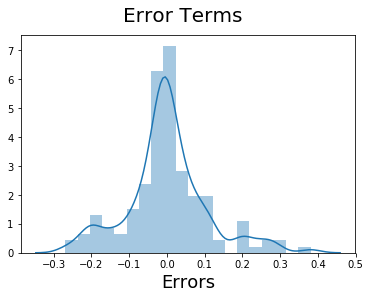

In [193]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- The errors terms resemble normal distribution to 80 - 90% .
- Mean is also centered at 0.

- From this, we can conclude that our assumption is correct and error terms are normally distributed with mean 0.


Now, Our assumptions are correct. We will proceed to check if our model is able to predict on test test.

### Step 8: Making Predictions with the final model.

In [194]:
# Scaling the test set.
car_vars = ['wheelbase', 'carlength', 'carwidth','carheight',
            'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_test[car_vars] = scaler.transform(df_test[car_vars])
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cyl-three,cyl-twelve,cyl-two,fuelsys-2bbl,fuelsys-4bbl,fuelsys-idi,fuelsys-mfi,fuelsys-mpfi,fuelsys-spdi,fuelsys-spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.454894,0.568398,0.489651,0.511828,0.437905,0.267012,0.550691,0.542848,0.217238,0.243548,...,0.0,0.0,0.0,0.241935,0.0,0.129032,0.016129,0.532258,0.016129,0.016129
std,0.219348,0.190241,0.175411,0.197333,0.191321,0.159156,0.224737,0.157856,0.278003,0.151566,...,0.0,0.0,0.0,0.431751,0.0,0.337972,0.127000,0.503032,0.127000,0.127000
min,0.000000,0.056911,0.183333,0.083333,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.029167,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.450813,0.341667,0.360417,0.307700,0.177358,0.404762,0.484848,0.095312,0.125000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.406897,0.559350,0.462500,0.533333,0.392552,0.230189,0.531746,0.585859,0.125000,0.195833,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.603448,0.741057,0.606250,0.658333,0.602890,0.320755,0.746032,0.641414,0.150000,0.309375,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.000000,0.935609,0.932075,1.000000,0.863636,1.000000,0.566667,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
# Divide sample into y_test & X_test.
y_test = df_test.pop('price')
X_test = df_test

In [196]:
# Now let's use our model 13 to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_13.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 144 to 2
Data columns (total 4 columns):
const             62 non-null float64
horsepower        62 non-null float64
cyl-four          62 non-null uint8
drivewheel-fwd    62 non-null uint8
dtypes: float64(2), uint8(2)
memory usage: 1.6+ KB


In [197]:
# Making predictions
y_pred = lr13.predict(X_test)

### Step 9: Model Evaluation using predicted and test valuation.

Text(0, 0.5, 'y_pred')

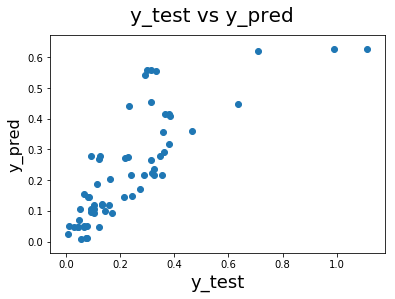

In [198]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

It is clear from the above plot that the model 13 (i.e. lr13) is able to predict the price.


#### The equation for regression Line is:

- horsepower, cylinder quantiy - four, drivewheel location -forward are variable, which can be used to predict the price of cars using below formula.
    - `price` = `0.7035 * horsepower` - `0.1462 * cyl-four` - `0.0915 * drivewheel-fwd` + `0.2265`
- As assumption are True and model is able to predict values on test test set nicely.
- It can concluded that this model can be used for interpretation and prediction.




## Finish